# Guided Experiments 5: Unsupervised Learning 1

# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import graphviz
import mglearn as mglearn
import mglearn.plots
import mglearn.datasets
import matplotlib.pyplot as plt
# ensures plots are inlined for the notebook presentation
%matplotlib inline 
import scipy as sp
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, ward
import time
from IPython.display import display
import seaborn as sns
import os
import tensorflow as tf

In [2]:
# Sci-Kit Imports
import sklearn as sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

import sklearn.datasets as datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
# from sklearn.datasets import load_breast_cancer
# from sklearn.datasets import fetch_lfw_people
# from sklearn.datasets import load_digits
# from sklearn.datasets import make_moons
# from sklearn.datasets import make_circles
from sklearn.datasets import load_wine

In [3]:
# Mute warnings
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# warnings.simplefilter(action='ignore', category=WARNING)

In [8]:
# Apply DBSCAN to synthetic data set

# from sklearn.datasets import make_blobs 
# make synthetic data 
X_blob, y_blob = make_blobs(random_state=321, n_samples=150)

Text(0, 0.5, 'Feature 1')

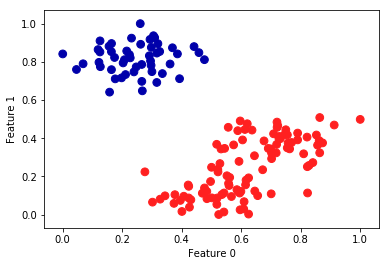

In [9]:
# import numpy as np
# import mglearn as mglearn
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.cluster import DBSCAN

# rescale the data to zero mean and unit variance
MMscaler = MinMaxScaler()
MMscaler.fit(X_blob)
X_scaled_MM = MMscaler.transform(X_blob)

# apply DBSCAN with decreased eps below default (0.5) to define clusters
dbscan = DBSCAN(eps=0.3, min_samples=35)
clusters = dbscan.fit_predict(X_scaled_MM)

# plot the cluster assignments
plt.scatter(X_scaled_MM[:, 0], X_scaled_MM[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Use PCA for dimensionality reduction on Wine data set

In [10]:
# Load Wine data set, binarize and train test split
# from sklearn.datasets import load_wine
from sklearn.preprocessing import label_binarize
wine = load_wine(return_X_y=False)

# Create Pandas DataFrame
wine_target = pd.DataFrame(wine.target_names, columns=['class'])
wine_features = pd.DataFrame(wine.data, columns=wine.feature_names)

wine_target_binarize = label_binarize(wine_target, classes=[0,1,2])
n_classes = 3

wine_features, wine_target_binarize = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(wine_features, wine_target_binarize, 
                                                    test_size=0.30, random_state=321)

In [11]:
## Apply Standard Scalar to Wine data set for preprocessing

# from sklearn.preprocessing import StandardScaler
# It is important to apply exact same transformation to training and test sets
# preprocessing using zero mean and unit variance scaling - StandardScaler
# scale data using StandardScaler
SSscaler = StandardScaler() 
 
# Efficiently calling fit and transform on training and test set
X_train_scaled= SSscaler.fit_transform(X_train)
X_test_scaled= SSscaler.fit_transform(X_test)

In [12]:
## USING STANDARD SCALAR ON PCA

# Use pipeline for PCA and application of algorithm for further dimensionality reduction
# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.decomposition import PCA
# from sklearn.pipeline import make_pipeline
# from sklearn.tree import DecisionTreeClassifier

# Fit to data and predict using pipelined PCA, 
# and DecisionTreeClassifier for additional dimensionality reduction
dt_clf = make_pipeline(PCA(n_components=3), DecisionTreeClassifier(random_state=321))
dt_clf.fit(X_train_scaled, y_train)
pred_X_train = dt_clf.predict(X_train_scaled)
pred_X_test = dt_clf.predict(X_test_scaled)


print('\nPrediction accuracy for scaled train data with StandardScalar and PCA')
print('{:.2%}'.format(metrics.accuracy_score(pred_X_train, y_train)))
print('Prediction accuracy for scaled test data with StandardScalar and PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(pred_X_test, y_test)))


print("Training set R^2 score: {:.2f}".format(dt_clf.score(X_train_scaled, y_train))) 
print("Test set R^2 score: {:.2f}".format(dt_clf.score(X_test_scaled, y_test)))


Prediction accuracy for scaled train data with StandardScalar and PCA
100.00%
Prediction accuracy for scaled test data with StandardScalar and PCA
85.19%

Training set R^2 score: 1.00
Test set R^2 score: 0.85


In [13]:
## Apply MinMaxScalar to Wine data set for preprocessing

# from sklearn.preprocessing import MinMaxScaler
# It is important to apply exact same transformation to training and test sets
# Computes the Min and Max falue of each feature
# scale data using MinMaxScaler
MMscaler = MinMaxScaler() 
 
# Efficiently calling fit and transform on training and test set
X_train_scaled= MMscaler.fit_transform(X_train)
X_test_scaled= MMscaler.fit_transform(X_test)

In [14]:
## USING MIN_MAX_SCALAR ON PCA <<--MORE ACCURATE

# Use pipeline for PCA and application of algorithm for further dimensionality reduction
# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.decomposition import PCA
# from sklearn.pipeline import make_pipeline
# from sklearn.tree import DecisionTreeClassifier

# Fit to data and predict using pipelined PCA, 
# and DecisionTreeClassifier for additional dimensionality reduction
dt_clf = make_pipeline(PCA(n_components=3), DecisionTreeClassifier(random_state=321))
dt_clf.fit(X_train_scaled, y_train)
pred_X_train = dt_clf.predict(X_train_scaled)
pred_X_test = dt_clf.predict(X_test_scaled)

print('\nPrediction accuracy for scaled train data with StandardScalar and PCA')
print('{:.2%}'.format(metrics.accuracy_score(pred_X_train, y_train)))
print('Prediction accuracy for scaled test data with StandardScalar and PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(pred_X_test, y_test)))

print("Training set R^2 score: {:.2f}".format(dt_clf.score(X_train_scaled, y_train))) 
print("Test set R^2 score: {:.2f}".format(dt_clf.score(X_test_scaled, y_test)))

print('\nMinMaxScalar Appears to be more accurate than using StandardScalar')


Prediction accuracy for scaled train data with StandardScalar and PCA
100.00%
Prediction accuracy for scaled test data with StandardScalar and PCA
90.74%

Training set R^2 score: 1.00
Test set R^2 score: 0.91

MinMaxScalar Appears to be more accurate than using StandardScalar
